In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

Using TensorFlow backend.


In [2]:
model = keras.models.load_model('./TrainedModels/generator_model_200.h5', compile= False)
model2 = keras.models.load_model('./TrainedModels/generator_model_200_2.h5', compile= False)

In [3]:
def plotter(model, n_samples=49):
    pnts = []
    plt.figure(figsize=(18,9))
    for i in range(n_samples):
        ran = np.random.randn(n_samples, 100)
        sqrt = int(np.sqrt(n_samples))
        plt.subplot(sqrt, sqrt, i+1)
        X = model.predict(ran)
        pnts.append(ran)
        X = (X + 1) / 2.0
        plt.imshow(X[0])
        plt.axis('off')
    plt.show()
    return pnts

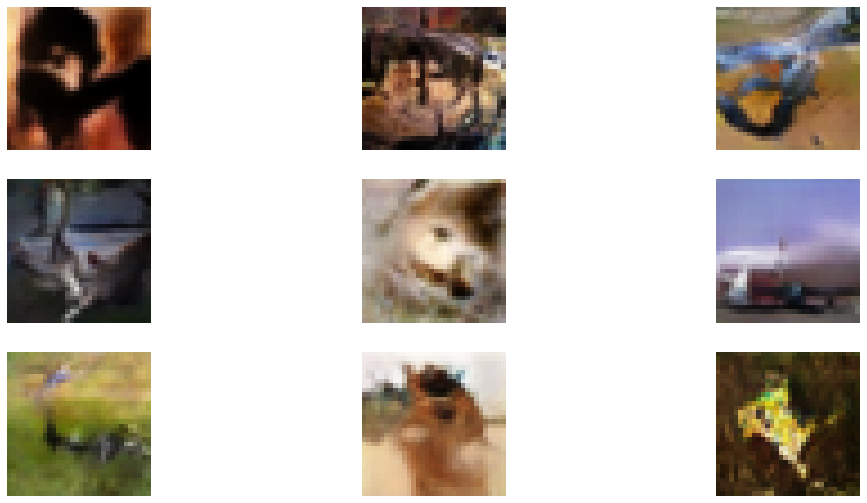

In [4]:
pnts = plotter(model, n_samples= 9)

In [5]:
pnts = np.array(pnts)
p0 = np.array(pnts[1])
p1 = np.array(pnts[8])

In [12]:
def create_movie(model, p0, p1, n= 100):
    interp = np.linspace(p0, p1, num= n)
    
    video_name = 'Video.avi'
    height, width, layers = 64, 64, 3
    video = cv2.VideoWriter(video_name, 0, 1, (width,height))
    
    for i in range(interp.shape[0]):
        x_inp = interp[i]
        X = model.predict(x_inp)[0]
        X = (X + 1) / 2.0
        X = np.uint8(255 * X)
        X = cv2.pyrUp(X)
        video.write(X)
    video.release()
    cv2.destroyAllWindows()

In [ ]:
create_movie(model= model, p0= p0, p1= p1, n= 3000)

In [ ]:
cap = cv2.VideoCapture('Video.avi')
while(cap.isOpened()):
    ret, frame = cap.read()
    cv2.imshow('frame', frame)
    if cv2.waitKey(1):
        break
cap.release()
cv2.destroyAllWindows()